In [1]:
import requests
import random
from IPython.display import Markdown, display, HTML
from PIL import Image
from io import BytesIO
import warnings
warnings.filterwarnings('ignore')

**Generating a movie description...**

1. Sam and Gray are such a well-matched pair that it is difficult to believe they are brother and sister rather than husband and wife. They both share a love of 1940s movies and dancing, and when they meet Charlie, they have something else in common: They both fall in love with her. Sam must deal with unexpected feelings of jealousy, while Gray struggles to come to terms with her sexual orientation.

Does this movie sound interesting to you? Please type yes or no: no


**Generating a movie description...**

2. It is an adaptation of the Charles Dickens classic A Christmas Carol, featuring Scrooge McDuck as his namesake and inspiration Ebenezer Scrooge and Mickey Mouse as Bob Cratchit. This film was based on a 1972 audio musical entitled Disney's A Christmas Carol. It is a twenty-four minute animated short film produced by Walt Disney Productions as an accompaniment to a re-release of The Rescuers.

Does this movie sound interesting to you? Please type yes or no: ajsdk
Invalid input. Please type yes or no: 
Does this movie sound interesting to you? Please type yes or no: yes


**Retrieving movie details...**

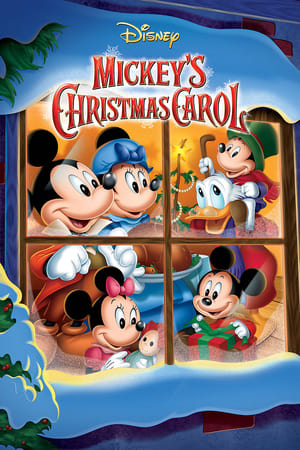

**Title:** Mickey's Christmas Carol

**Genres:** Family, Animation

**Release Date (year-month-date):** 1983-10-19

**Cast Members:** Alan Young, Wayne Allwine, Clarence Nash, Hal Smith, Will Ryan, Patricia Parris, Dick Billingsley, Eddie Carroll

**Number of votes:** 372

**Average Rating (Based on user votes, out of 10):** 7.6

**Description:** It is an adaptation of the Charles Dickens classic A Christmas Carol, featuring Scrooge McDuck as his namesake and inspiration Ebenezer Scrooge and Mickey Mouse as Bob Cratchit. This film was based on a 1972 audio musical entitled Disney's A Christmas Carol. It is a twenty-four minute animated short film produced by Walt Disney Productions as an accompaniment to a re-release of The Rescuers.

Would you like to watch the trailer of Mickey's Christmas Carol? Please type yes or no: aksjd
Invalid input. Please type yes or no: 
Would you like to watch the trailer of Mickey's Christmas Carol? Please type yes or no: no
Would you like to generate more movies? Please type yes or no: asdj
Invalid input. Please type yes or no: 
Would you like to generate more movies? Please type yes or no: yes


**Generating a movie description...**

3. With Blue Mountain State football star Thad Castle recently signing a multi-million dollar NFL contract, his teammates and college life seem like a distant memory. However, when a new school dean threatens to clean up the BMS image by auctioning off the infamous Goat House, Alex, Sammy and the boys must find a way to convince him to get involved. Despite his new fortune and fame, there is one small favor that Thad needs done before he saves the day: the biggest booze-and-sloot fest in BMS history. Welcome to Thadland!

Does this movie sound interesting to you? Please type yes or no: ajds
Invalid input. Please type yes or no: 
Does this movie sound interesting to you? Please type yes or no: no


**Generating a movie description...**

4. Mr. Death: The Rise and Fall of Fred A. Leuchter, Jr. is a 1999 documentary film by Errol Morris about execution technician Fred A. Leuchter.

Does this movie sound interesting to you? Please type yes or no: yes


**Retrieving movie details...**

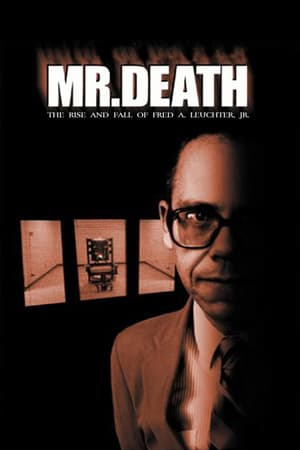

**Title:** Mr. Death: The Rise and Fall of Fred A. Leuchter, Jr.

**Genres:** Documentary

**Release Date (year-month-date):** 1999-12-29

**Cast Members:** Fred A. Leuchter Jr., Robert Jan Van Pelt, David Irving, Caroline Leuchter

**Number of votes:** 25

**Average Rating (Based on user votes, out of 10):** 6.7

**Description:** Mr. Death: The Rise and Fall of Fred A. Leuchter, Jr. is a 1999 documentary film by Errol Morris about execution technician Fred A. Leuchter.

Would you like to watch the trailer of Mr. Death: The Rise and Fall of Fred A. Leuchter, Jr.? Please type yes or no: yes


Would you like to generate more movies? Please type yes or no: no
Would you like to get similar movie titles to: Mr. Death: The Rise and Fall of Fred A. Leuchter, Jr.? Please type yes or no: asd
Invalid input. Please type yes or no: 
Would you like to get similar movie titles to: Mr. Death: The Rise and Fall of Fred A. Leuchter, Jr.? Please type yes or no: yes


**Getting similar movie titles...**

The Umbrella Man, Get on the Bus, Nine Inch Nails: Broken, Thank You Mask Man, The Trials Of Darryl Hunt, Fast, Cheap & Out of Control, Sick: The Life and Death of Bob Flanagan, Supermasochist, Sherman's March, Witch Hunt, Gates of Heaven, No End in Sight, Vernon, Florida, Why We Fight, The Tulse Luper Suitcases, Part 1: The Moab Story, Private Confessions, Dark Days, The Wonderful, Horrible Life of Leni Riefenstahl, In the Year of the Pig, Highway 61, Harlan County U.S.A.


In [6]:
page_number = 0
overview_length = 0
movies = 0
count = 1

def printbold(string):
    display(Markdown(string))
    
def moviegenerator():
    amount_of_movies = []
    while(len(amount_of_movies)-1<0):
        global page_number
        page_number = str(random.randint(0,991))
        api_key = 'ed49669e2301eefe165a22a0551c3496'
        response = requests.get('https://api.themoviedb.org/3/movie/popular?api_key=' +  api_key + '&language=en-US&page=' + page_number)
        global movies
        movies = response.json()
        try:
            for i in range(0,len(movies['results'])):
                amount_of_movies.append(movies['results'][i].get('title'))
        except KeyError: 'results'
    if(len(amount_of_movies)!=0):
        global overview_length
        overview_length = random.randint(0,len(amount_of_movies)-1)

def getOverview():
    return str(movies['results'][overview_length].get('overview'))

def getTitle():
    return movies['results'][overview_length].get('title')

def getReleasedate():
    return movies['results'][overview_length].get('release_date')

def getAverageRating():
    return str(movies['results'][overview_length].get('vote_average'))

def getVoteCount():
    return str(movies['results'][overview_length].get('vote_count'))

def getGenre():
    genres = []
    all_genres = []
    genre_names = []
    api_key = 'ed49669e2301eefe165a22a0551c3496'
    our_movie_genre_ids =  movies['results'][overview_length].get('genre_ids')
    genre_response = requests.get('https://api.themoviedb.org/3/genre/movie/list?api_key=' +  api_key + '&language=en-US')
    genre = genre_response.json()
    for i in range(0,len(genre['genres'])):
        all_genres.append(genre['genres'][i].get('id'))
        genre_names.append(genre['genres'][i].get('name'))

    for i in range(0,len(our_movie_genre_ids)):
        for j in range(0,len(all_genres)):
            if our_movie_genre_ids[i] == all_genres[j]:
                genres.append(genre_names[j])
    return (', '.join(genres))

def getPosterpath():
    return movies['results'][overview_length].get('poster_path')

def getMoviePoster():
    poster_url = ('https://image.tmdb.org/t/p/w300/' + getPosterpath())
    response = requests.get(poster_url)
    img = Image.open(BytesIO(response.content))
    return img

def getId():
    return movies['results'][overview_length].get('id')

def getCast():
    all_cast = []
    api_key = 'ed49669e2301eefe165a22a0551c3496'
    cast_url = ('https://api.themoviedb.org/3/movie/'+ str(getId()) + '/credits?api_key=' + api_key)
    response = requests.get(cast_url)
    cast_members = response.json()
    for i in range(0,len(cast_members['cast'])):
        all_cast.append(cast_members['cast'][i].get('name'))
    return (', '.join(all_cast))

def getSimilarMovies():
    similar_movies = []
    api_key = 'ed49669e2301eefe165a22a0551c3496'
    response = requests.get('https://api.themoviedb.org/3/movie/' + str(getId()) + '/recommendations?api_key=' + api_key + '&language=en-US&page=1')
    recommended_movies = response.json()
    for i in range(0,len(recommended_movies['results'])):
        if recommended_movies['results'] == '[]':
            print("No similar movies found for " + getTitle())
        else:
            similar_movies.append(recommended_movies['results'][i].get('title'))
    return similar_movies

def wantSimilarMovies():
    similar_movies_input = input("Would you like to get similar movie titles to: " + getTitle() + '? Please type yes or no: ').lower()
    while True:
        if similar_movies_input == 'yes':
            printbold("**Getting similar movie titles...**")
            print(*getSimilarMovies(), sep=', ')
            break
        elif similar_movies_input == 'no':
            print("Hope you enjoy watching " + getTitle() + '!')
            break
        else:
            print('Invalid input. Please type yes or no: ')
            similar_movies_input = input("Would you like to get similar movie titles to: " + getTitle() + '? Please type yes or no: ').lower()

def getVideoKey():
    video_key = []
    first_key = None
    api_key = 'ed49669e2301eefe165a22a0551c3496'
    videodetails_url = ('https://api.themoviedb.org/3/movie/' + str(getId()) + '/videos?api_key=' + api_key + '&language=en-US')
    video_response = requests.get(videodetails_url)
    response_data = video_response.json()
    for i in range(0,len(response_data['results'])):
        video_key.append(response_data['results'][i].get('key'))
    for key in range(0,len(video_key)):
        first_key = video_key[0]
    return first_key
    
def getTrailer():
    return HTML("<iframe width=560 height=315 src=https://www.youtube.com/embed/" + getVideoKey() + ' frameborder="0" allowfullscreen></iframe>')            
            
def getMoreMovies():
    more_movies_input = input("Would you like to generate more movies? Please type yes or no: ").lower()
    while True:
        if more_movies_input == 'yes':
            global count
            count = count + 1
            getEverything()
            break
        elif more_movies_input == 'no':
            wantSimilarMovies()
            break
        else:
            print("Invalid input. Please type yes or no: ")
            more_movies_input = input("Would you like to generate more movies? Please type yes or no: ").lower()    

def getEverything():
    stop = True
    global count
    while stop:
        getMovie()
        user_input = input("Does this movie sound interesting to you? Please type yes or no: ").lower()
        while True:
            if user_input == 'yes':
                getMovieDetails()
                trailer_input = input("Would you like to watch the trailer of %s? Please type yes or no: " % getTitle()).lower()
                while True:
                    if trailer_input == 'yes':
                        display(getTrailer())
                        getMoreMovies()
                        break
                    elif trailer_input == 'no':
                        getMoreMovies()
                        break
                    else:
                        print("Invalid input. Please type yes or no: ")
                        trailer_input = input("Would you like to watch the trailer of %s? Please type yes or no: " % getTitle()).lower()
                stop = False
                break
            elif user_input == 'no':
                count = count + 1
                break
            else:
                print("Invalid input. Please type yes or no: ")
                user_input = input("Does this movie sound interesting to you? Please type yes or no: ").lower()
            
def getMovieDetails():
    printbold('**Retrieving movie details...**')
    display(getMoviePoster())
    printbold("**Title:**" + ' ' + getTitle())
    printbold("**Genres:**" + ' ' + getGenre())
    printbold("**Release Date (year-month-date):**" + ' ' + getReleasedate())
    printbold("**Cast Members:**" + ' ' + getCast())
    printbold("**Number of votes:**" + ' ' + getVoteCount())
    printbold("**Average Rating (Based on user votes, out of 10):**" + ' ' + getAverageRating())
    printbold("**Description:**" + ' ' + getOverview())

def getMovie():
    moviegenerator()
    while getOverview() == '':
        moviegenerator()
    printbold('**Generating a movie description...**')
    print(str(count) + '.', getOverview() + '\n')
            
#main function
stop = True
while stop:
    getMovie()
    user_input = input("Does this movie sound interesting to you? Please type yes or no: ").lower()
    while True:
        if user_input == 'yes':
            getMovieDetails()
            trailer_input = input("Would you like to watch the trailer of %s? Please type yes or no: " % getTitle()).lower()
            while True:
                if trailer_input == 'yes':
                    display(getTrailer())
                    getMoreMovies()
                    break
                elif trailer_input == 'no':
                    getMoreMovies()
                    break
                else:
                    print("Invalid input. Please type yes or no: ")
                    trailer_input = input("Would you like to watch the trailer of %s? Please type yes or no: " % getTitle()).lower()
            stop = False
            break
        elif user_input == 'no':
            count = count + 1
            break
        else:
            print("Invalid input. Please type yes or no: ")
            user_input = input("Does this movie sound interesting to you? Please type yes or no: ").lower()